In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

In [4]:
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Supplement_Sales_Weekly_Expanded.csv')

In [9]:
df.head(2)


,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.isna().sum().sum()

np.int64(0)

In [14]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,Date,Units Sold,Price,Revenue,Discount,Units Returned
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,0.124398,1.531478
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,0.060000,1.000000
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,0.120000,1.000000
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,0.190000,2.000000
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,0.250000,8.000000
std,NaN,12.396099,14.198309,2192.491946,0.071792,1.258479


In [17]:
df.describe(include='object')

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [18]:
daily_sales = df.groupby('Date').agg({'Revenue': 'sum', 'Units Sold': 'sum', 'Units Returned':'sum'}).reset_index()

In [19]:
daily_sales

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34
...,...,...,...,...
269,2025-03-03,66065.44,2431,36
270,2025-03-10,92509.57,2411,30
271,2025-03-17,65590.53,2381,22
272,2025-03-24,69778.44,2416,27


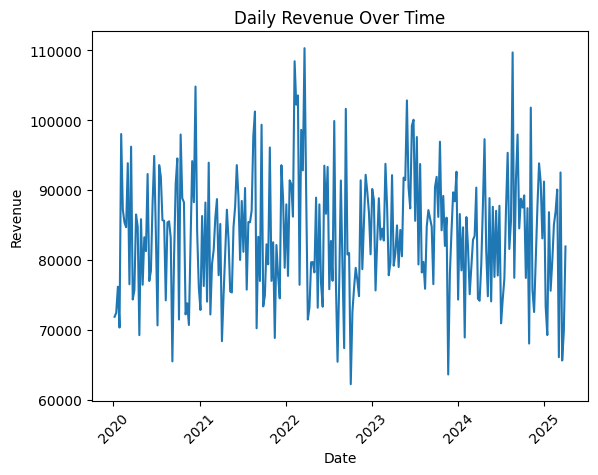

In [20]:
sns.lineplot(data=daily_sales, x='Date', y='Revenue')
plt.title('Daily Revenue Over Time')
plt.xticks(rotation=45)
plt.show()

In [23]:
category_revenue= df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

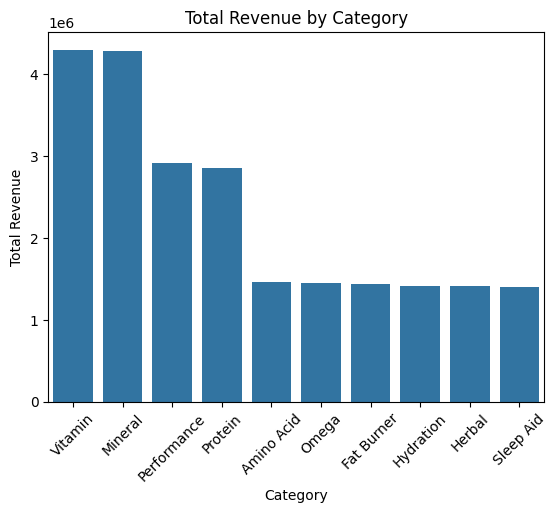

In [24]:
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Total Revenue by Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

In [25]:
loc_platform = df.groupby(['Location', 'Platform'])['Revenue'].sum().unstack().fillna(0)

In [26]:
loc_platform

Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


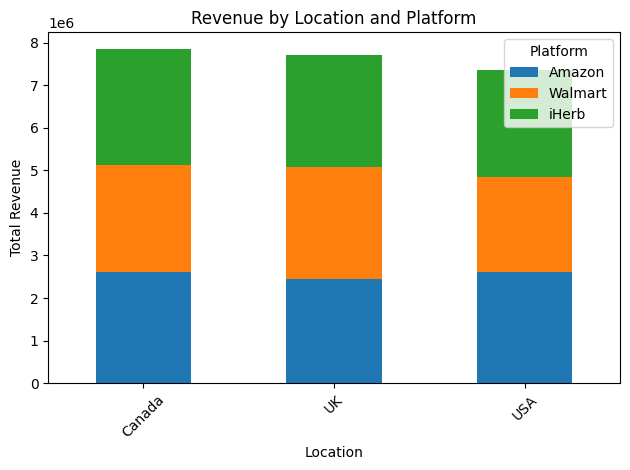

In [28]:
loc_platform.plot(kind='bar', stacked=True)
plt.title('Revenue by Location and Platform')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
top_products = df.groupby('Product Name')['Revenue'].sum().sort_values(ascending=False).head(10)

In [30]:
top_products

Product Name
Biotin               1486798.62
Zinc                 1482546.95
Pre-Workout          1477183.78
BCAA                 1464819.63
Fish Oil             1451065.87
Green Tea Extract    1440900.05
Collagen Peptides    1433297.24
Creatine             1432518.40
Iron Supplement      1431582.41
Whey Protein         1422194.85
Name: Revenue, dtype: float64

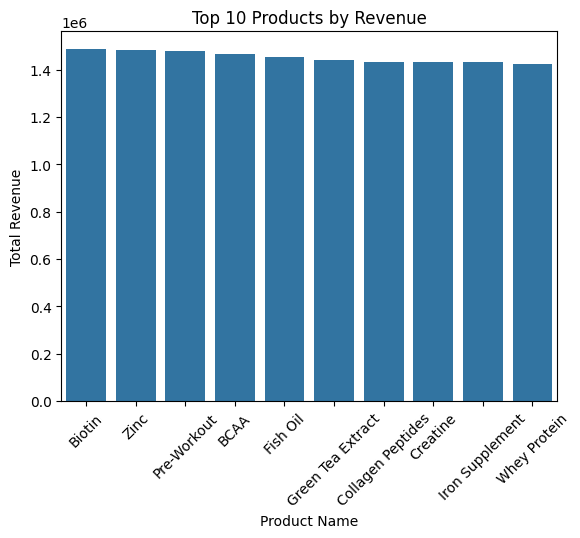

In [31]:
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [32]:
df["return_rate"] = df["Units Returned"] / df["Units Sold"]

In [34]:
category_return_rate = df.groupby('Category')['return_rate'].mean().sort_values(ascending=False)

In [35]:
category_return_rate

Category
Hydration      0.010746
Vitamin        0.010475
Amino Acid     0.010355
Fat Burner     0.010229
Performance    0.010207
Protein        0.010203
Mineral        0.010079
Omega          0.009870
Sleep Aid      0.009860
Herbal         0.009433
Name: return_rate, dtype: float64

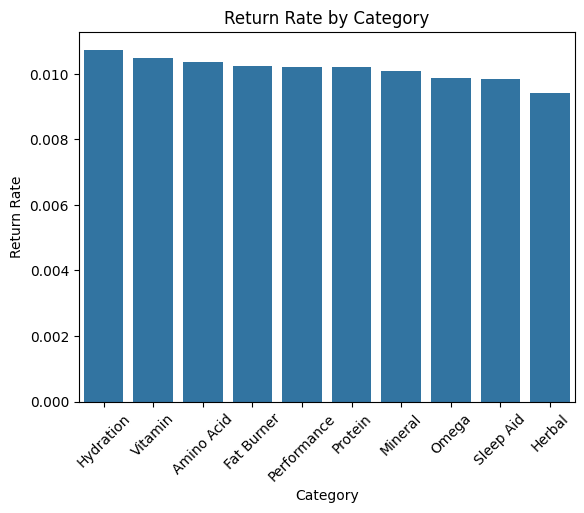

In [36]:
sns.barplot(x=category_return_rate.index, y=category_return_rate.values)
plt.title('Return Rate by Category')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.show()


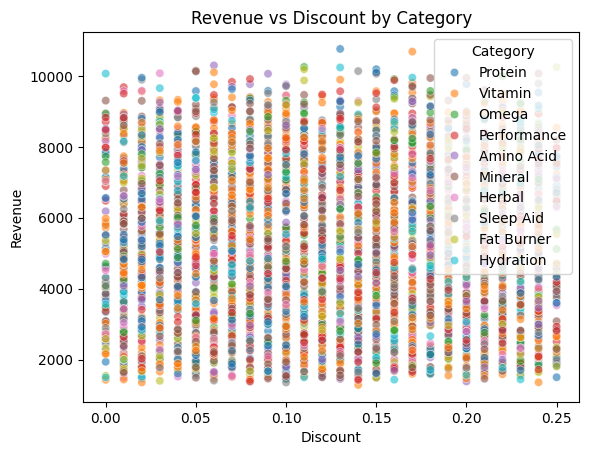

In [38]:
sns.scatterplot(data=df, x='Discount', y='Revenue', hue='Category', alpha=0.6)
plt.title('Revenue vs Discount by Category')
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.show()

In [43]:
corr=df[["Units Sold","Price","Revenue","Discount","Units Returned"]].corr()

In [44]:
corr

,Units Sold,Price,Revenue,Discount,Units Returned
Units Sold,1.000000,0.013749,0.210462,-0.010435,0.116523
Price,0.013749,1.000000,0.977198,-0.008668,-0.010410
Revenue,0.210462,0.977198,1.000000,-0.012531,0.012432
Discount,-0.010435,-0.008668,-0.012531,1.000000,0.004276
Units Returned,0.116523,-0.010410,0.012432,0.004276,1.000000


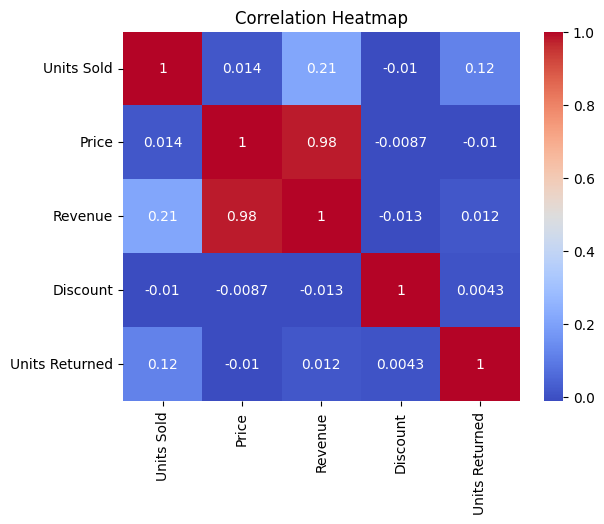

In [45]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
fig = px.line(df, x='Date', y='Revenue', color='Category', title='Revenue Over Time by Category')
fig.show()

In [48]:
df["Monthly"]= df["Date"].dt.to_period("M")
monthly_sales = df.groupby('Monthly').agg({'Revenue': 'sum', 'Units Sold': 'sum', "Discount": 'mean', 'Units Returned': 'sum'}).reset_index()

In [49]:
monthly_sales

,Monthly,Revenue,Units Sold,Discount,Units Returned
0,2020-01,290723.89,9547,0.120313,101
1,2020-02,355213.26,9493,0.128125,91
2,2020-03,416547.17,12145,0.111375,123
3,2020-04,326287.92,9605,0.138281,91
4,2020-05,333210.99,9557,0.119375,90
...,...,...,...,...,...
58,2024-11,329894.33,9838,0.117813,106
59,2024-12,446728.99,12042,0.127125,99
60,2025-01,304965.15,9617,0.125156,92
61,2025-02,341768.25,9542,0.128125,103


In [50]:
monthly_sales['Monthly'] = monthly_sales['Monthly'].astype(str)

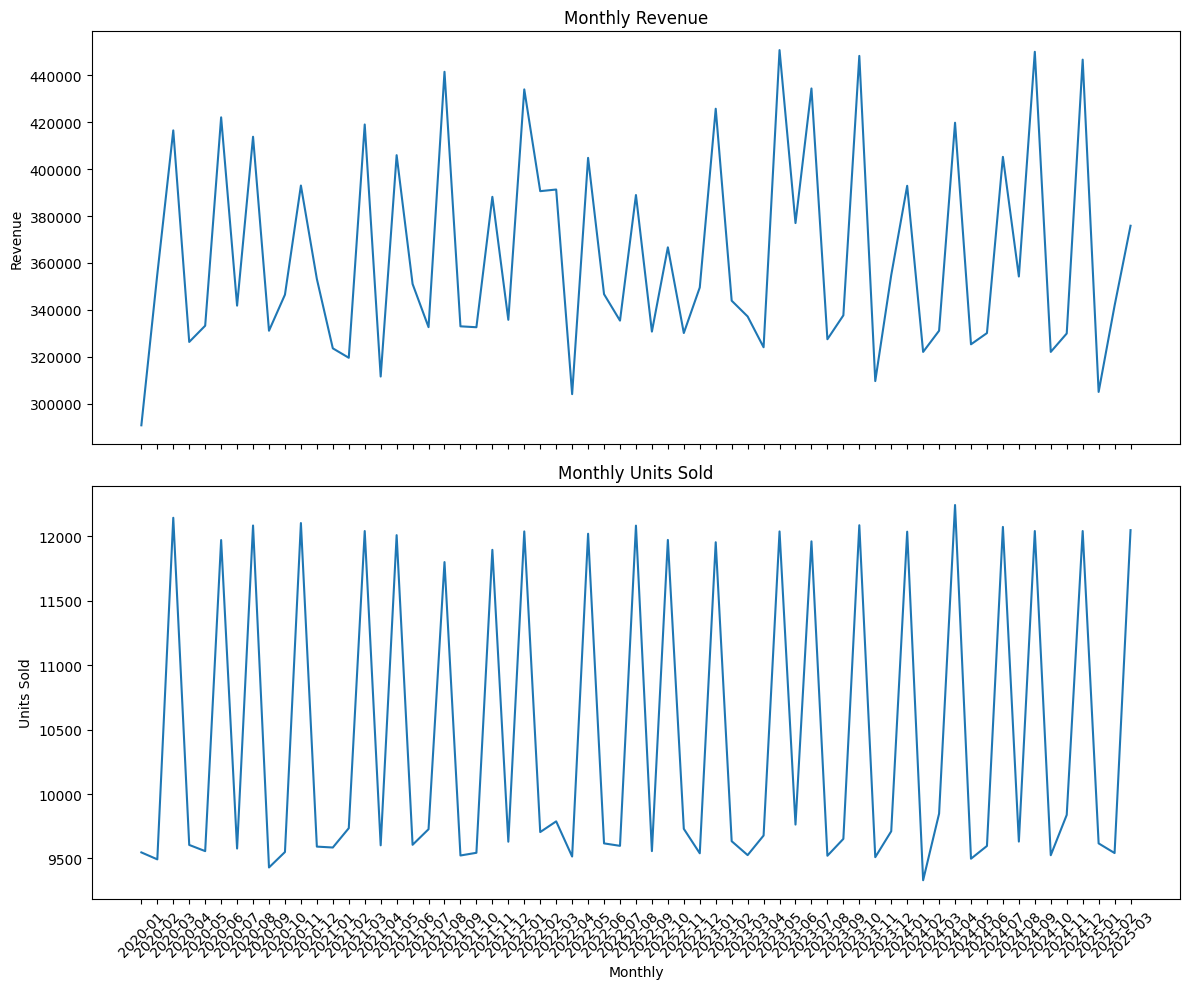

In [54]:
fig, axes = plt.subplots(2, 1,sharex=True, figsize=(12, 10))
sns.lineplot(data=monthly_sales, x='Monthly', y='Revenue', ax=axes[0])
axes[0].set_title('Monthly Revenue')
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=monthly_sales, x='Monthly', y='Units Sold', ax=axes[1])
axes[1].set_title('Monthly Units Sold')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()




In [55]:
df["Net Revenue"] = df["Revenue"] - (df["Units Returned"] * df["Price"])

In [56]:
df.head(2)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,return_rate,Monthly,Net Revenue
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986,2020-01,4509.18
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000,2020-01,5908.89


In [57]:
category_profit = df.groupby('Category')['Net Revenue'].sum().sort_values(ascending=False)

In [58]:
category_profit

Category
Vitamin        4255337.22
Mineral        4233108.50
Performance    2879997.43
Protein        2827040.48
Amino Acid     1449514.18
Omega          1436916.36
Fat Burner     1426130.43
Hydration      1396778.95
Herbal         1392349.37
Sleep Aid      1383401.64
Name: Net Revenue, dtype: float64

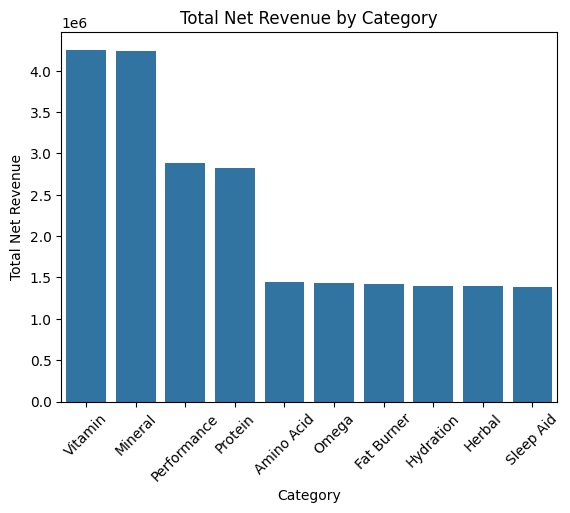

In [59]:
sns.barplot(x=category_profit.index, y=category_profit.values)
plt.title('Total Net Revenue by Category')
plt.ylabel('Total Net Revenue')
plt.xticks(rotation=45)
plt.show()
